# Boston housting prices

$Equipo:$ 
Daniel Hernandez Navarro,
Iñaki Sebastián Orozco García

## 1. Importamos las librerías que vamos a necesitar y los datos de el documento que vamos a manipular

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [7]:
filas = []
with open('boston_corrected.txt', 'r') as file:
    for line in file:
        if(not(line[0].isalpha() or line[0].isspace())):
            line = line.split("\t")
            filas.append(line)
filas

[['1',
  'Nahant',
  '0',
  '2011',
  '-70.955000',
  '42.255000',
  '24.0',
  '24.0',
  '0.00632',
  '18.0',
  '2.31',
  '0',
  '0.538',
  '6.575',
  '65.2',
  '4.0900',
  '1',
  '296',
  '15.3',
  '396.90',
  '4.98\n'],
 ['2',
  'Swampscott',
  '1',
  '2021',
  '-70.950000',
  '42.287500',
  '21.6',
  '21.6',
  '0.02731',
  '0.0',
  '7.07',
  '0',
  '0.469',
  '6.421',
  '78.9',
  '4.9671',
  '2',
  '242',
  '17.8',
  '396.90',
  '9.14\n'],
 ['3',
  'Swampscott',
  '1',
  '2022',
  '-70.936000',
  '42.283000',
  '34.7',
  '34.7',
  '0.02729',
  '0.0',
  '7.07',
  '0',
  '0.469',
  '7.185',
  '61.1',
  '4.9671',
  '2',
  '242',
  '17.8',
  '392.83',
  '4.03\n'],
 ['4',
  'Marblehead',
  '2',
  '2031',
  '-70.928000',
  '42.293000',
  '33.4',
  '33.4',
  '0.03237',
  '0.0',
  '2.18',
  '0',
  '0.458',
  '6.998',
  '45.8',
  '6.0622',
  '3',
  '222',
  '18.7',
  '394.63',
  '2.94\n'],
 ['5',
  'Marblehead',
  '2',
  '2032',
  '-70.922000',
  '42.298000',
  '36.2',
  '36.2',
  '0.06905',

In [8]:
data = pd.DataFrame(filas, columns=['OBS.', 'TOWN', "TOWN#", 'TRACT', 'LON', 'LAT', 'MEDV', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [11]:
data

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.955000,42.255000,24.0,24.0,0.00632,18.0,...,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98\n
1,2,Swampscott,1,2021,-70.950000,42.287500,21.6,21.6,0.02731,0.0,...,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14\n
2,3,Swampscott,1,2022,-70.936000,42.283000,34.7,34.7,0.02729,0.0,...,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03\n
3,4,Marblehead,2,2031,-70.928000,42.293000,33.4,33.4,0.03237,0.0,...,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94\n
4,5,Marblehead,2,2032,-70.922000,42.298000,36.2,36.2,0.06905,0.0,...,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,Winthrop,91,1801,-70.986000,42.231200,22.4,22.4,0.06263,0.0,...,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67\n
502,503,Winthrop,91,1802,-70.991000,42.227500,20.6,20.6,0.04527,0.0,...,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08\n
503,504,Winthrop,91,1803,-70.994800,42.226000,23.9,23.9,0.06076,0.0,...,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64\n
504,505,Winthrop,91,1804,-70.987500,42.224000,22.0,22.0,0.10959,0.0,...,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48\n


### (a) Download the Boston Housing Data

How many rows are in this data set? 506

How many columns? 21

What do the rows and columns represent? The rows represent each one of the samples of data and the columns represent the different characteristics of the samples.

## Columns:
CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per 10,000 dollars

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [32]:
data.isnull().sum()

OBS.       0
TOWN       0
TOWN#      0
TRACT      0
LON        0
LAT        0
MEDV       0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Podemos ver que no nos falta ningún dato en ninguna columna, nuestra información es consistente.

In [33]:
data.keys

<bound method NDFrame.keys of     OBS.        TOWN TOWN# TRACT         LON        LAT  MEDV CMEDV     CRIM  \
0      1      Nahant     0  2011  -70.955000  42.255000  24.0  24.0  0.00632   
1      2  Swampscott     1  2021  -70.950000  42.287500  21.6  21.6  0.02731   
2      3  Swampscott     1  2022  -70.936000  42.283000  34.7  34.7  0.02729   
3      4  Marblehead     2  2031  -70.928000  42.293000  33.4  33.4  0.03237   
4      5  Marblehead     2  2032  -70.922000  42.298000  36.2  36.2  0.06905   
..   ...         ...   ...   ...         ...        ...   ...   ...      ...   
501  502    Winthrop    91  1801  -70.986000  42.231200  22.4  22.4  0.06263   
502  503    Winthrop    91  1802  -70.991000  42.227500  20.6  20.6  0.04527   
503  504    Winthrop    91  1803  -70.994800  42.226000  23.9  23.9  0.06076   
504  505    Winthrop    91  1804  -70.987500  42.224000  22.0  22.0  0.10959   
505  506    Winthrop    91  1805  -70.982500  42.221000  11.9  19.0  0.04741   

       ZN

Para poder interpretar y utilizar la informarción necesitamos hacer dos modificaciones: primero eliminar las columnas innecesarias para nuestro análisis, segundo cambiar la información al tipo de dato que requerimos.
Todas las columnas son de tipo Object, pero para nuestro análisis estaremos utilizando valores numéricos, por lo tanto cambiamos el tipo de las columnas a numérico.

In [12]:
cdata = data.drop(["OBS.", "TOWN", "TOWN#", "LON", "LAT", "TRACT"], axis=1) #quitantdo columnas innecesarias
cdata = cdata.apply(pd.to_numeric)
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CMEDV    506 non-null    float64
 2   CRIM     506 non-null    float64
 3   ZN       506 non-null    float64
 4   INDUS    506 non-null    float64
 5   CHAS     506 non-null    int64  
 6   NOX      506 non-null    float64
 7   RM       506 non-null    float64
 8   AGE      506 non-null    float64
 9   DIS      506 non-null    float64
 10  RAD      506 non-null    int64  
 11  TAX      506 non-null    int64  
 12  PTRATIO  506 non-null    float64
 13  B        506 non-null    float64
 14  LSTAT    506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


In [13]:
cdata

,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,20.6,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,23.9,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,22.0,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


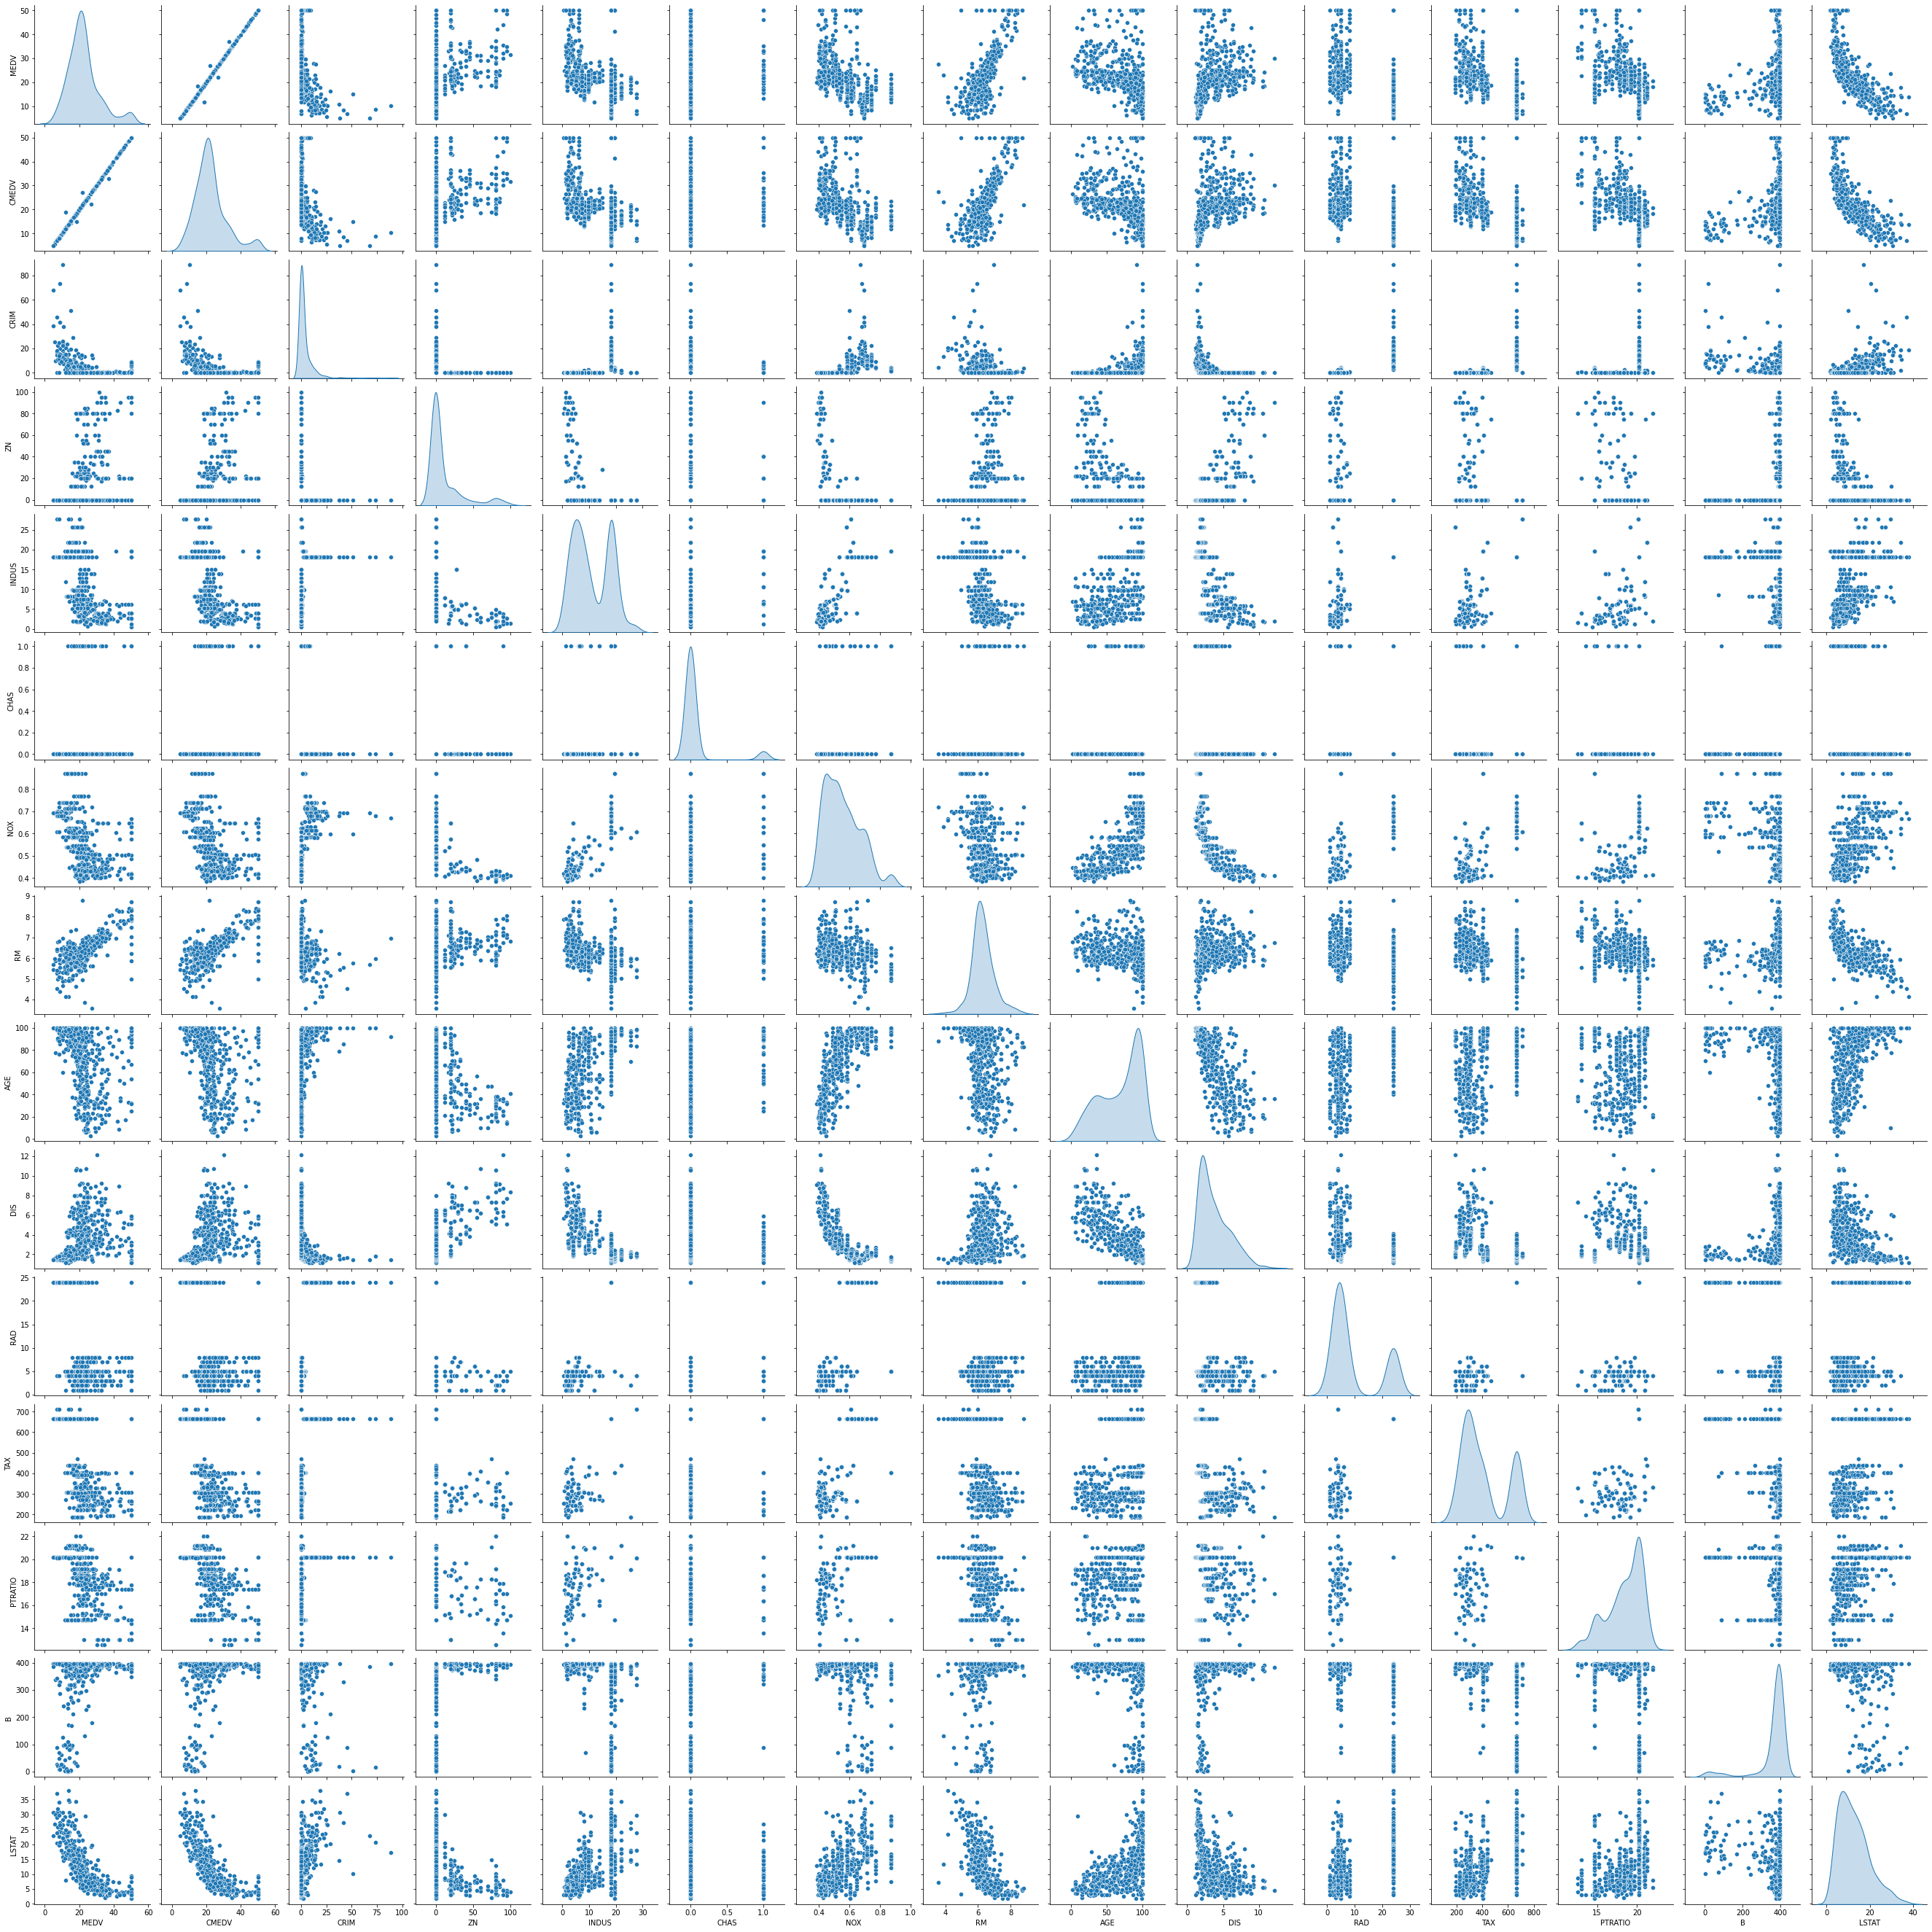

In [33]:
sns.pairplot(cdata, diag_kind='kde')

### (b) Make some pairwise scatterplots of the predictors (columns) in this data set.
Describe your findings.


Al graficar la concentración de Óxido Nítrico podemos observar que cuando la concentración está entre 0.6 y 0.7, el crimen per cápita se encuentra en sus puntos más altos.

También podemos observar que las personas afroamericanas y el crimen per cápita parecen no tener mucha relación, ya que haya o no personas afroamericanas el crimen permanece al mismo ritmo.

Podemos ver que entre mayor es el valor medio de casas ocupadas por sus dueños en miles de dólares es menor el porcentaje del estatus menor de la población.

Entre mayor es la proporción de negocios mayoristas en el área, mayores son los impuestos en las propiedades.

## (c) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

Si, 

## (d) Do any of the suburbs of Boston appear to have particularly high crime rates? 
Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

## (e) How many of the suburbs in this data set bound the Charles river?

## (f) What is the median pupil-teacher ratio among the towns in this data set?

## (g) Which suburb of Boston has lowest median value of owner occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? 
Comment on your findings.

## (h) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms per dwelling.

## (i) Split the data in training (70%) and test (30%) data, use the linear regression model with the training data, and test it to predict House value. 
How well did the model perform? How can you improve these results?

## (j) We will now try to predict per capita crime rate using the other variables in this data set. 
In 
other words, per capita crime rate is the response, and the other variables are the predictors.
For each predictor, individually, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant association 
between the predictor and the response? Create some plots to back up your assertions.


## (k) Fit a multiple regression model to predict the response using all the predictors. 
Describe your results. 
For which predictors can we get the best results?
Which predictors can be eliminated?


## (l) How do your results from (j) compare to your results from (k)?